In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import re
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rescale
from PIL import Image

import pandas as pd
from pandas import read_csv

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip '/content/drive/MyDrive/Galaxy_images_training_rev1.zip' -d '/content/drive/MyDrive/'

In [ ]:
solusi_data = read_csv('/content/drive/MyDrive/Galaxy training_solutions_rev1.csv')
image_data_galaksi = "/content/drive/MyDrive/images_galaxy"
sd = solusi_data
img = image_data_galaksi

In [ ]:
#data = np.empty((0,96,96,3))
#for (root, dirs, files) in os.walk(img):
  #for i in range(0,data_train):
    #files = sorted(files, key=str)
    #path = os.path.join(root, files[i])
    #imgs = tf.keras.preprocessing.image.load_img(path, target_size=(96, 96))
    #image = tf.keras.preprocessing.image.img_to_array(imgs)
    #image = np.expand_dims(image, axis=0)
    #image /= 255.0
    #data = np.vstack((data,image))

#data di-save
#np.save("/content/drive/MyDrive/TugasTA/data_mentah", data)

#data yang sudah di-save di GDrive di-load ulang
data = np.load("/content/drive/MyDrive/TugasTA/data_mentah96x96.npy")

In [ ]:
j = 1     # iterasi awal untuk kolom pertama ; j+3 = iterasi syarat ke-2 ; j+5 = iterasi syarat ke-3
k = 14    # iterasi syarat ke-6
l = 8     # iterasi syarat ke-4

In [ ]:
label = []
data_train = 9000

for i in range(0,data_train):
  id_galaxy = sd._get_value(i,0, takeable = True)   # nama ID galaksi  
  a = np.array(sd.iloc[i,j:(j+3)])                  # data syarat ke-1 dari 1.1 - 1.3
  b = np.array(sd.iloc[i,k:(k+2)])                  # data syarat ke-6 dari 6.1 - 6.2
  c = np.array(sd.iloc[i,l:(l+2)])                  # data syarat ke-4 dari 4.1 (index : l = 8) - 4.2

  if (sd._get_value(i,j, takeable = True) == max(a) and sd._get_value(i, (k+1), takeable = True) == max(b)): # syarat 1.1 dan 6.2
    print('Galaxy ID : ', id_galaxy, '\n Elips Galaxy')
    label.append(0)
      
  elif (sd._get_value(i, (j+1), takeable = True) == max(a) and sd._get_value(i, l, takeable = True) == max(c)): # syarat 1.2, dan 4.1
    print('Galaxy ID : ', id_galaxy, '\n Spiral Galaxy')
    label.append(1)

  elif sd._get_value(i, (j+2), takeable = True) == max(a): # syarat 1.3
    print('Galaxy ID : ', id_galaxy, '\n Artifact')
    label.append(3)
  
  else:  
    print('Galaxy ID : ', id_galaxy, '\n Irregular Galaxy')
    label.append(2)

label = np.asarray(label)

Streaming output truncated to the last 5000 lines.
Galaxy ID :  196070 
 Irregular Galaxy
Galaxy ID :  196096 
 Spiral Galaxy
Galaxy ID :  196133 
 Irregular Galaxy
Galaxy ID :  196142 
 Elips Galaxy
Galaxy ID :  196174 
 Elips Galaxy
Galaxy ID :  196177 
 Elips Galaxy
Galaxy ID :  196191 
 Spiral Galaxy
Galaxy ID :  196192 
 Irregular Galaxy
Galaxy ID :  196228 
 Irregular Galaxy
Galaxy ID :  196246 
 Elips Galaxy
Galaxy ID :  196255 
 Spiral Galaxy
Galaxy ID :  196267 
 Elips Galaxy
Galaxy ID :  196280 
 Spiral Galaxy
Galaxy ID :  196282 
 Elips Galaxy
Galaxy ID :  196285 
 Irregular Galaxy
Galaxy ID :  196315 
 Elips Galaxy
Galaxy ID :  196347 
 Spiral Galaxy
Galaxy ID :  196358 
 Elips Galaxy
Galaxy ID :  196366 
 Spiral Galaxy
Galaxy ID :  196375 
 Elips Galaxy
Galaxy ID :  196414 
 Elips Galaxy
Galaxy ID :  196418 
 Spiral Galaxy
Galaxy ID :  196431 
 Irregular Galaxy
Galaxy ID :  196440 
 Elips Galaxy
Galaxy ID :  196474 
 Elips Galaxy
Galaxy ID :  196487 
 Irregular Galaxy
Gala

In [ ]:
def load_dataset(): 
  
  classes = ['Elips', 'Spiral', 'Tidak Beraturan', 'Artifact']
  x = data
  y = label
             
  return x, y, classes

In [ ]:
x, y, classes = load_dataset()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3)

# Architecture #1

In [ ]:
# Convolusi dengan Filter 32 dan 16 tanpa MaxPooling
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip(input_shape=(96, 96, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = Sequential(
    [
     data_augmentation,
     layers.Conv2D(16, (3,3), padding='same', activation='relu'), 
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(32, (3,3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, (3,3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Dropout(0.5),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(512, activation="relu"),
     layers.Dense(512, activation="relu"),
     layers.Dropout(0.5),
     layers.Dense(4, activation='softmax')
    ]
)                                              

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 96, 96, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
batch2 = 15

history2 = model2.fit(x_train, y_train, batch_size=batch2, epochs=240, validation_data=(x_test,y_test))

Epoch 1/240
420/420 [==============================] - 94s 221ms/step - loss: 1.0934 - accuracy: 0.4403 - val_loss: 0.9998 - val_accuracy: 0.5070
Epoch 2/240
420/420 [==============================] - 89s 213ms/step - loss: 1.0135 - accuracy: 0.5129 - val_loss: 0.9703 - val_accuracy: 0.5333
Epoch 3/240
420/420 [==============================] - 88s 211ms/step - loss: 0.9891 - accuracy: 0.5257 - val_loss: 1.0009 - val_accuracy: 0.5463
Epoch 4/240
420/420 [==============================] - 89s 211ms/step - loss: 0.9777 - accuracy: 0.5270 - val_loss: 0.9926 - val_accuracy: 0.5496
Epoch 5/240
420/420 [==============================] - 91s 216ms/step - loss: 0.9689 - accuracy: 0.5386 - val_loss: 1.0282 - val_accuracy: 0.5426
Epoch 6/240
420/420 [==============================] - 89s 212ms/step - loss: 0.9687 - accuracy: 0.5357 - val_loss: 0.9406 - val_accuracy: 0.5615
Epoch 7/240
420/420 [==============================] - 88s 210ms/step - loss: 0.9653 - accuracy: 0.5381 - val_loss: 0.9286 -

# Architecture #2

In [ ]:
# Convolusi dengan Filter 32 dan 16 dengan MaxPooling 2x2
# Convolusi dengan Filter 32 dan 16 tanpa MaxPooling
model2 = Sequential(
    [
     data_augmentation,
     layers.Conv2D(16, (3,3), padding='same', activation='relu'), 
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.BatchNormalization(),
     layers.Conv2D(32, (3,3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.BatchNormalization(),
     layers.Conv2D(64, (3,3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.BatchNormalization(),
     layers.Dropout(0.5),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(512, activation="relu"),
     layers.Dense(512, activation="relu"),
     layers.Dropout(0.5),
     layers.Dense(4, activation='softmax')
    ]
)                                              

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 96, 96, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)      

In [ ]:
batch = 15

history = model.fit(x_train, y_train, epochs=240, validation_data=(x_test, y_test), batch_size=batch)

Epoch 1/240
420/420 [==============================] - 87s 204ms/step - loss: 1.0411 - accuracy: 0.4792 - val_loss: 0.9194 - val_accuracy: 0.5748
Epoch 2/240
420/420 [==============================] - 85s 203ms/step - loss: 0.9567 - accuracy: 0.5427 - val_loss: 0.9563 - val_accuracy: 0.5448
Epoch 3/240
420/420 [==============================] - 85s 204ms/step - loss: 0.9317 - accuracy: 0.5571 - val_loss: 0.9226 - val_accuracy: 0.5737
Epoch 4/240
420/420 [==============================] - 82s 195ms/step - loss: 0.9229 - accuracy: 0.5605 - val_loss: 0.8939 - val_accuracy: 0.5756
Epoch 5/240
420/420 [==============================] - 82s 196ms/step - loss: 0.9117 - accuracy: 0.5641 - val_loss: 0.8785 - val_accuracy: 0.5926
Epoch 6/240
420/420 [==============================] - 81s 192ms/step - loss: 0.9056 - accuracy: 0.5760 - val_loss: 0.9334 - val_accuracy: 0.5478
Epoch 7/240
420/420 [==============================] - 83s 197ms/step - loss: 0.8989 - accuracy: 0.5751 - val_loss: 0.8743 -

# Architecture #3

In [ ]:
# Convolusi dengan Filter 3 dan 3 dengan MaxPooling Filter 2 x 2
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip(input_shape=(96, 96, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model3 = Sequential(
    [
     data_augmentation,
     layers.Conv2D(4, (3,3), padding='same', activation='relu'),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, (3,3), padding='same', activation='relu'), 
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Dropout(0.5),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(300, activation="relu"),
     layers.Dense(300, activation="relu"),
     layers.Dropout(0.5),
     layers.Dense(4, activation='softmax')
    ]
)                                              

model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')


model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 96, 96, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 96, 4)         112       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 4)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        2368      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)       

In [ ]:
model3.save("/content/drive/MyDrive/TugasTA/model_archi_2")

In [ ]:
batch3 = 15

history3 = model3.fit(x_train, y_train, epochs=240, validation_data=(x_test, y_test), batch_size=batch3)

Epoch 1/240
420/420 [==============================] - 104s 244ms/step - loss: 1.0785 - accuracy: 0.4316 - val_loss: 0.9467 - val_accuracy: 0.5548
Epoch 2/240
420/420 [==============================] - 98s 233ms/step - loss: 0.9678 - accuracy: 0.5440 - val_loss: 0.9285 - val_accuracy: 0.5611
Epoch 3/240
420/420 [==============================] - 96s 229ms/step - loss: 0.9450 - accuracy: 0.5516 - val_loss: 0.9498 - val_accuracy: 0.5474
Epoch 4/240
420/420 [==============================] - 97s 232ms/step - loss: 0.9453 - accuracy: 0.5584 - val_loss: 0.9086 - val_accuracy: 0.5685
Epoch 5/240
420/420 [==============================] - 93s 221ms/step - loss: 0.9320 - accuracy: 0.5614 - val_loss: 0.9028 - val_accuracy: 0.5689
Epoch 6/240
420/420 [==============================] - 93s 222ms/step - loss: 0.9259 - accuracy: 0.5573 - val_loss: 0.9153 - val_accuracy: 0.5615
Epoch 7/240
420/420 [==============================] - 93s 222ms/step - loss: 0.9270 - accuracy: 0.5630 - val_loss: 0.9160 

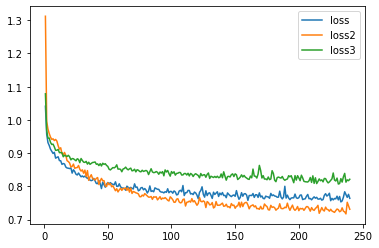

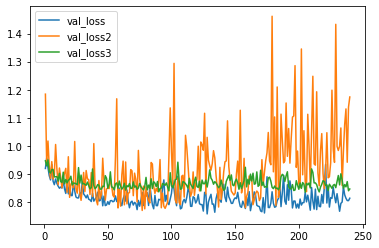

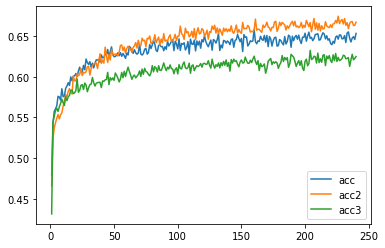

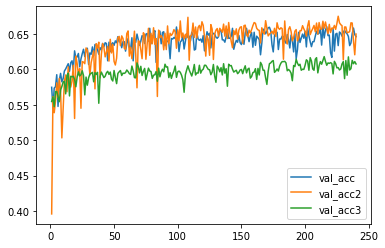

In [ ]:
loss = np.load("/content/drive/MyDrive/TugasTA/loss1.npy")
val_loss = np.load("/content/drive/MyDrive/TugasTA/val_loss1.npy")
loss2 = np.load("/content/drive/MyDrive/TugasTA/loss2.npy")
val_loss2 = np.load("/content/drive/MyDrive/TugasTA/val_loss2.npy")
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epoch = range(1, len(loss3)+1)

plt.plot(epoch, loss, label = 'loss') 
plt.plot(epoch, loss2, label = 'loss2') 
plt.plot(epoch, loss3, label = 'loss3') 
plt.legend()
plt.show()

print("\n")

plt.plot(epoch, val_loss, label = 'val_loss')
plt.plot(epoch, val_loss2, label = 'val_loss2')
plt.plot(epoch, val_loss3, label = 'val_loss3')
plt.legend()
plt.show()

print("\n")

acc = np.load("/content/drive/MyDrive/TugasTA/acc1.npy")
val_acc = np.load("/content/drive/MyDrive/TugasTA/val_acc1.npy")
acc2 = np.load("/content/drive/MyDrive/TugasTA/acc2.npy")
val_acc2 = np.load("/content/drive/MyDrive/TugasTA/val_acc2.npy")
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

plt.plot(epoch, acc, label = 'acc') 
plt.plot(epoch, acc2, label = 'acc2') 
plt.plot(epoch, acc3, label = 'acc3') 
plt.legend()
plt.show()

print("\n")

plt.plot(epoch, val_acc, label = 'val_acc')
plt.plot(epoch, val_acc2, label = 'val_acc2')
plt.plot(epoch, val_acc3, label = 'val_acc3')
plt.legend()
plt.show()